In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [36]:
data =pd.read_csv('./small_portfolio.csv',index_col=0,parse_dates=True)

In [37]:
pf_AUM = data.PG

In [38]:
# Calculate total rate of return from portfolio AUM
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_83656\2115526701.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


In [39]:
months = 38

In [40]:
# Calculate total rate of return from start to end
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize return
annualized_return = ((1 + total_return)**(12/months))-1
print(annualized_return)

-0.04646694460588585


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_83656\2362052427.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


Great work! Well that's a pretty great return right? Now that you've learned the steps to annualize returns, you can use this type of return to compare portfolios who have different time spans. In the next exercise, let's see how you can use annualized return to objectively compare investment opportunities.

In [41]:
sp500_value = pd.read_csv('./sp500.csv',parse_dates=True,index_col=0)
sp500_value = np.array(sp500_value) 

In [42]:
sp500_value[1] 

array([2020.579956])

In [43]:
# Calculate the total return from the S&P500 value series
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]
print(total_return)

# Annualize the total return spanning 4 years
annualized_return = ((1 + total_return)**(1/4))-1
print(annualized_return)

[0.37623658]
[0.08311177]


Wonderful work! You see that once you get the hang of it, annualizing returns is relatively straightforward. But it is oh so important when you are comparing portfolio performance numbers, as you're using the same yardstick to measure them against. In the next lesson, you'll learn more about returns and how you should take into account the level of risk taken to achieve those returns. In fact, you'll see that the portfolio returns, although much higher, might not be that great compared to the S&P500 after all, when you take risk into account!

When the Sharpe ratio is below 1, the return does not outweigh the risk proportionally. Although there might be other reasons to invest in such a portfolio, the Sharpe ratio doesn't indicate you are getting a great risk-return trade-off.

In [44]:
# Calculate total return and annualized return from price data 
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1
sp500_value = pd.read_csv('./sp500.csv',parse_dates=True,index_col=0)
# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)
rfr =0
# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

S&P500    0.610504
dtype: float64


In [45]:
# Calculate total return and annualized return from price data 
total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]

# Annualize the total return over 4 years 
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf_AUM.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = (annualized_return - rfr) / vol_pf
print(sharpe_ratio)

-0.3233987755089043


C:\Users\jdamodhar\AppData\Local\Temp\ipykernel_83656\19027010.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (pf_AUM[-1] - pf_AUM[0]) / pf_AUM[0]


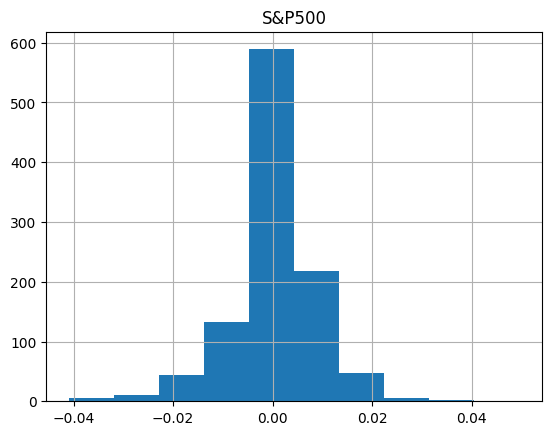

In [46]:
# Create a histogram of the S&P500 returns and show the plot
returns_sp500.hist()
plt.show()

In [47]:
# Print the mean
print("mean : ", returns_sp500.mean()*100)

# Print the standard deviation
print("Std. dev  : ", returns_sp500.std()*100)

# Print the skewness
print("skew : ", returns_sp500.skew())

# Print the kurtosis
print("kurt : ", returns_sp500.kurtosis())

mean :  S&P500    0.0339
dtype: float64
Std. dev  :  S&P500    0.861002
dtype: float64
skew :  S&P500   -0.383199
dtype: float64
kurt :  S&P500    3.922391
dtype: float64


Fantastic! You see that calculating skewness and kurtosis is very easy, and gives you immediate insights into what you can expect as an investor in terms of returns. Let's compare skewness and kurtosis for a couple of investment options in the next exercise.

In [51]:
stock_prices = pd.read_csv('./small_portfolio.csv',parse_dates=True,index_col=0)
stock_returns = stock_prices.pct_change()

skew:  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt:  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


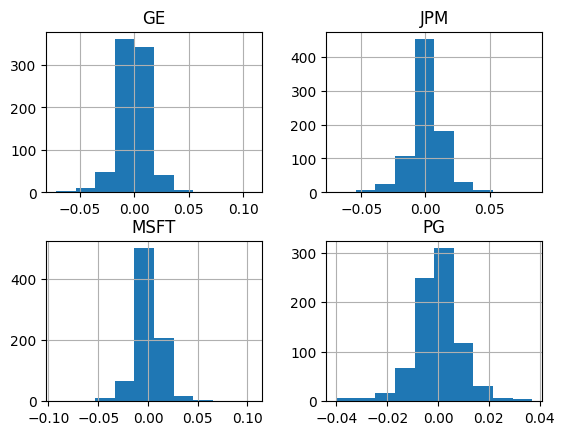

In [52]:
# Print the histograms of the stocks in the portfolio
stock_returns.hist()

# Print skewness and kurtosis of the stocks
print("skew: ", stock_returns.skew())
print("kurt: ", stock_returns.kurt())

In [53]:
print("kurt: ", stock_returns.kurtosis())

kurt:  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


skew :  GE      0.177313
JPM     0.018815
MSFT    0.515431
PG     -0.259934
dtype: float64
kurt :  GE      7.766370
JPM     3.831448
MSFT    9.882177
PG      2.848092
dtype: float64


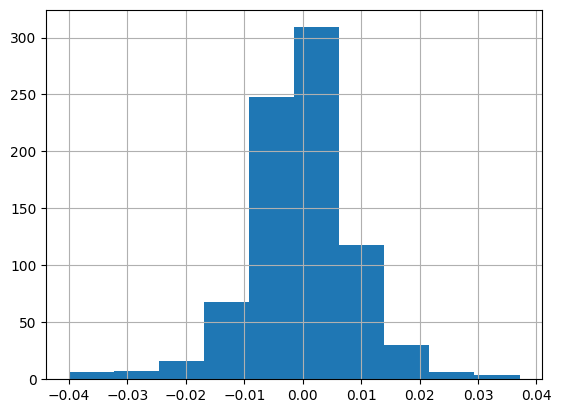

skew :  -0.25993428246896844
kurt :  2.848092409256249


In [54]:
# Print skewness and kurtosis of the stocks
print ("skew : ", stock_returns.skew())
print ("kurt : ", stock_returns.kurtosis())

# Plot the histogram of the portfolio
pf_returns.hist()
plt.show()

# Print skewness and kurtosis of the portfolio
print ("skew : ", pf_returns.skew())
print ("kurt : ", pf_returns.kurtosis())

Correct! A value above 3 indicates a fat tailed distribution. --kurt

<Axes: xlabel='date'>

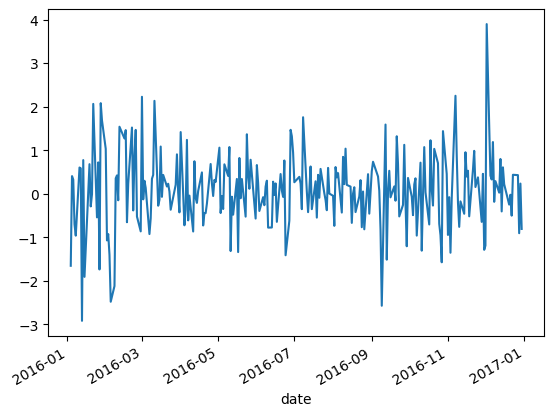

In [56]:
df = pd.read_csv('./factors_pf_returns.csv',parse_dates=True,index_col=0)
df.pf_returns.plot()

In [57]:
target = 0

In [58]:
# Create a downside return column with the negative returns only
downside_returns = df.loc[df['pf_returns'] < target]

# Calculate expected return and std dev of downside
expected_return = df['pf_returns'].mean()
down_stdev = downside_returns['pf_returns'].std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  7.648403652308076
Downside risk   :  56.81705809701296
Sortino ratio :  0.13461456661921353


In [62]:
max_daily_draw_down

,Mkt-RF,SMB,HML,RF,pf_returns
date,,,,,
2016-01-04,0.000000,0.000000,0.000000,NaN,0.000000
2016-01-05,0.000000,0.000000,-0.981132,NaN,0.000000
2016-01-06,-12.250000,0.000000,-1.000000,NaN,-0.202384
2016-01-07,-21.333333,0.000000,-1.000000,NaN,-2.710745
2016-01-08,-21.333333,0.000000,-1.056604,NaN,-3.350428
...,...,...,...,...,...
2016-12-23,-21.333333,-4.190476,-2.589744,-1.0,-5.821469
2016-12-27,-21.333333,-4.190476,-2.589744,-1.0,-5.821469
2016-12-28,-21.333333,-4.190476,-2.589744,-1.0,-5.821469


In [64]:
df=pd.read_csv('./sp500.csv',parse_dates=True,index_col=0)

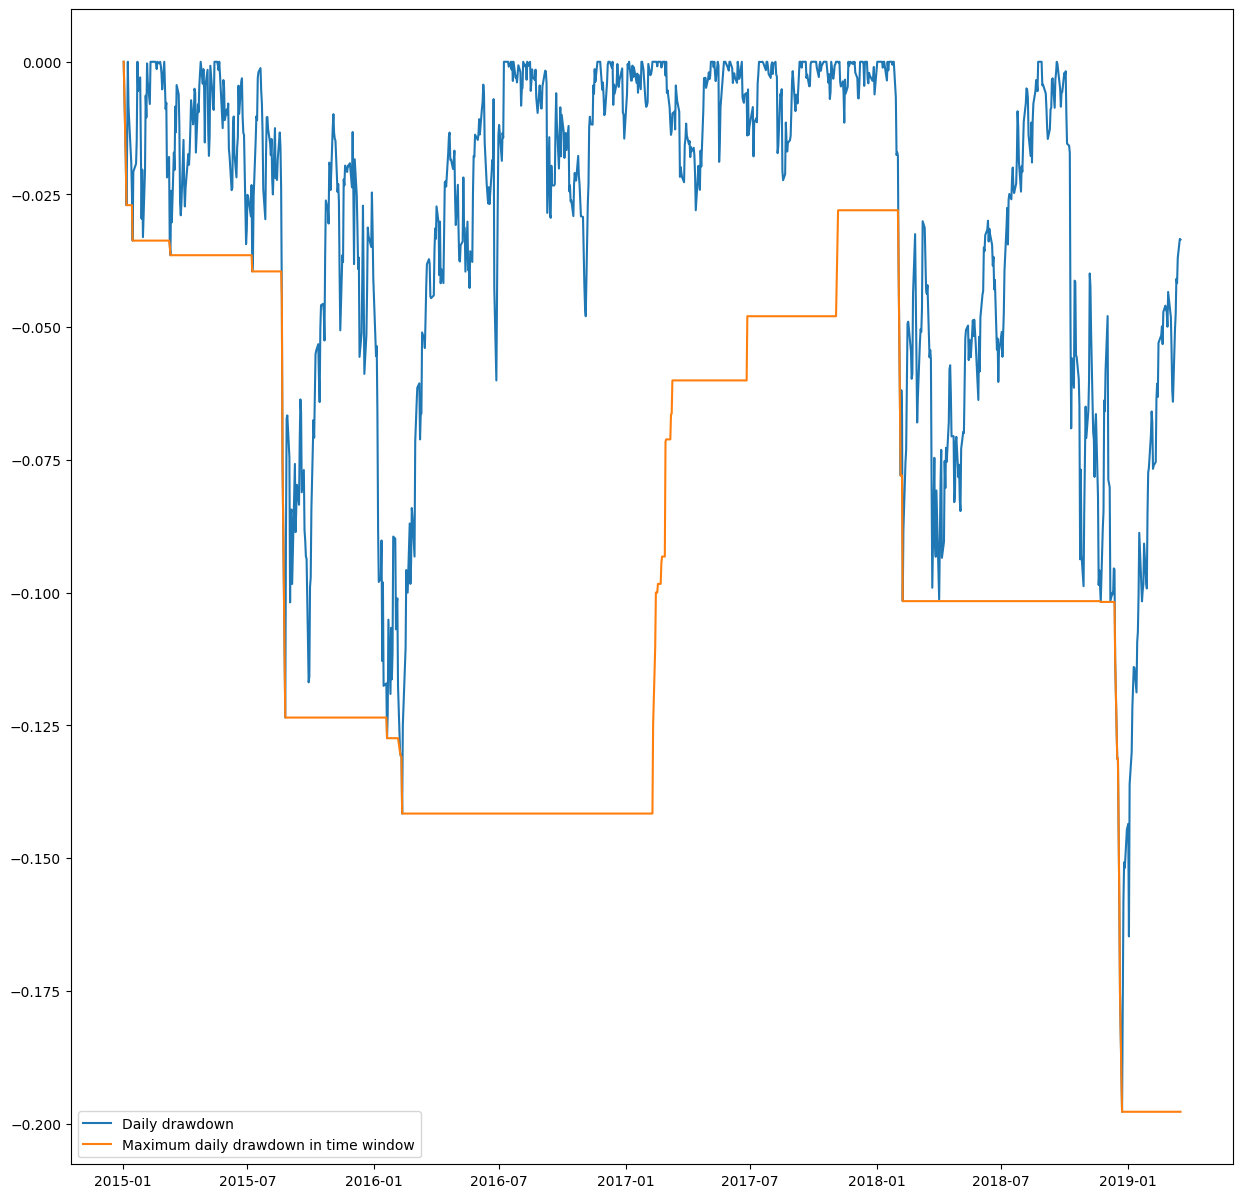

In [66]:
# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(df.index, daily_draw_down, label='Daily drawdown')
plt.plot(df.index, max_daily_draw_down, label='Maximum daily drawdown in time window')
plt.legend()
plt.show()